**TABLE OF CONTENTS**

1. [Introduction](#1-case-study-introduction)

    1.1 [Data description](#11-categorical-data-description)

    1.2 [Importing data and libs](#12-importing-data-and-libs)

2. [EDA and Data Cleansing](#2-exploratory-data-analisis-and-data-cleansing)

    2.1 [Data Cleansing](#21-data-cleansing)
    
3. [Applying and evaluating models](#3-applying-and-evaluating-models)

   3.1 [Selecting features](#31-selecting-features)

   3.2 [Model applying with personalized pipeline](#32-model-apllying-with-personalized-pipeline)

   3.3 [Model optimization with gridsearch and final results](#33-model-optimization-with-gridsearch-and-final-results)

   3.4 [Model saving](#34-model-saving)
    
4. [Developing gradio's application](#4-developing-gradio-app)

# **1. CASE STUDY INTRODUCTION**

The objective of this case study is to develop a Gradio application that predicts creditworthiness for bank clients.

To achieve this goal, I analyzed and prepared the dataset for machine learning models. The applied models are: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier, which are available in Python's sklearn library. To optimize the workflow and model results, I applied a personalized pipeline for model application and GridSearchCV for parameter optimization.

The data was obtained from Kaggle and can be accessed [HERE](https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv).

I used a previous work from Pennsylvania State University as a reference in many parts of the code, which can be accessed [HERE](https://online.stat.psu.edu/stat508/resource/analysis/gcd). Also, as this is a case study, the code steps are commented.

It is worth mentioning that the feature selection process was carefully performed according to the regulations of the Central Bank of Brazil, as I'm Brazilian.

## **1.1 Categorical Data Description**

Categorical data description:

Creditability:	
	
- 1:	credit-worthy

- 0:	not credit-worthy

Account Balance:	
	
- 1:	no running account

- 2:	no balance or debit

- 3:	0 <= ... < 200 DM

- 4:	... >= 200 DM or checking account for at least 1 year

Payment Status of Previous Credit:	
	
- 0:	hesitant payment of previous credits

- 1:	problematic running account / there are further credits running but at other banks

- 2:	no previous credits / paid back all previous credits

- 3:	no problems with current credits at this bank

- 4:	paid back previous credits at this bank

Purpose:	

- 0:	other

- 1:	new car

- 2:	used car

- 3:	items of furniture

- 4:	radio / television

- 5:	household appliances

- 6:	repair

- 8:	vacation

- 9:	retraining

- 10: business

Value Savings/Stocks:	

- 1:	not available / no savings

- 2:	< 100,- DM

- 3:	100,- <= ... < 500,- DM

- 4:	500,- <= ... < 1000,- DM

- 5:	>= 1000,- DM

Length of current employment:	

- 1:	unemployed

- 2:	<= 1 year

- 3:	1 <= ... < 4 years

- 4:	4 <= ... < 7 years

- 5:	>= 7 years

Instalment per cent:	

- 1:	>= 35

- 2:	25 <= ... < 35

- 3:	20 <= ... < 25

- 4:	< 20

Sex & Marital Status:	


- 1:	male: divorced / living apart

- 2:	male: single

- 3:	male: married / widowed

- 4:	female:

Guarantors:	

- 1:	none

- 2:	Co-Applicant

- 3:	Guarantor

Duration in Current address:

- 1:	< 1 year

- 2:	1 <= ... < 4 years

- 3:	4 <= ... < 7 years

- 4:	>= 7 years

Most valuable available asset:	

- 1:	not available / no assets

- 2:	Car / Other

- 3:	Savings contract with a building society / Life insurance

- 4:	Ownership of house or land

Concurrent Credits:	

- 1:	at other banks

- 2:	at department store or mail order house

- 3:	no further running credits

Type of apartment:	

- 1:	free apartment

- 2:	rented flat

- 3:	owner-occupied flat

No of Credits at this Bank:	

- 1:	one

- 2:	two or three

- 3:	four or five

- 4:	six or more

Occupation:	

- 1:	unemployed / unskilled with no permanent 

- 2:	unskilled with permanent residence

- 3:	skilled worker / skilled employee / minor civil servant

- 4:	executive / self-employed / higher civil servant

residence

No of dependents:	

- 1:	3 and more

- 2:	0 to 2

Telephone:	

- 1:	no

- 2:	yes

Foreign Worker:	

- 1:	no

- 2:	yes

## **1.2 IMPORTING DATA AND LIBS**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import gradio as gr

c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('\german_credit_risk\data\raw\german_credit')

# **2. EXPLORATORY DATA ANALISIS AND DATA CLEANSING**

First of all, let's take a look at our dataframe

In [3]:
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

C:\Users\Marcilio Duarte\AppData\Local\Temp\ipykernel_37532\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


In [5]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [6]:
for i in df.columns:
    print(f'\n{i}:\n')
    print(df[i].value_counts(normalize=True, ascending=True))
    print('\n-------------------\n')


Creditability:

0    0.3
1    0.7
Name: Creditability, dtype: float64

-------------------


Account Balance:

3    0.063
2    0.269
1    0.274
4    0.394
Name: Account Balance, dtype: float64

-------------------


Duration of Credit (month):

40    0.001
26    0.001
5     0.001
47    0.001
72    0.001
16    0.002
54    0.002
22    0.002
33    0.003
28    0.003
14    0.004
13    0.004
39    0.005
7     0.005
45    0.005
4     0.006
8     0.007
20    0.008
11    0.009
42    0.011
27    0.013
60    0.013
10    0.028
21    0.030
30    0.040
48    0.048
9     0.049
15    0.064
6     0.075
36    0.083
18    0.113
12    0.179
24    0.184
Name: Duration of Credit (month), dtype: float64

-------------------


Payment Status of Previous Credit:

0    0.040
1    0.049
3    0.088
4    0.293
2    0.530
Name: Payment Status of Previous Credit, dtype: float64

-------------------


Purpose:

8     0.009
10    0.012
4     0.012
5     0.022
6     0.050
9     0.097
1     0.103
2     0.181
0     0.23

Although the case is about German, my simulation is for brazilian banks. Because of that, I'll drop the columns "Sex and Marital Status" and "Foreign Worker."

According to Resolution No. 4,656 of the Central Bank of Brazil, in order to prevent discrimination and ensure equity in the credit evaluation process, banks are prohibited from using information of racial or ethnic origin, gender, sexual orientation, marital status, religion, political opinion, health, or disability for the purpose of credit risk assessment.

I'll also drop the column 'Telephone' because it's irrelevant for our analysis.

In [7]:
df.drop(columns=['Sex & Marital Status', 'Foreign Worker', 'Telephone'], inplace=True)

Okay, we have a dataset with 1000 rows and 18 columns with no null values. Also, we have a few columns that are trully numeric (like age), but most of the features are categorical texts encoded in numeric characters. Furthemore, most of these categorical columns do not have a good distribution of values within its categories. Usually, this is called oversampling ou undersampling (depend's on how you look at it), so we have to fix that before building our model. Let's do it.

## **2.1 Data Cleansing**

There are many ways to start a process of data manipulation/cleansing/processing, but no matter how you do it, this part of the process (usually) is the most time-consuming one. In this case in particular, as my goal is to show how to build a deployment application with the model I'll choose, I'll just repeat the steps applied in the same case study by professors of The Pennsylvania State University. This will gain us some time and it's actually a good method, since we're talking about the work of a renomade university.

Having that said, the first thing they did was to fix the distribution of categories within the columns by grouping a few categories that represented a small part of the column observations. They did this for 9 columns.

In their words:

*"Depending on the cell proportions given in the one-way table above two or more cells are merged for several categorical predictors. We present below the final classification for the predictors that may potentially have any influence on Creditability*
 
- *Account Balance: No account (1), None (No balance) (2), Some Balance (3)*
- *Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)*
- *Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM*
- *Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7*
- *Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female*
- *No of Credits at this bank: 1, More than 1*
- *Guarantor: None, Yes*
- *Concurrent Credits: Other Banks or Dept Stores, None*
- *Purpose of Credit: New car, Used car, Home Related, Other*"
 
So let's do the same thing here.

In [8]:
columns = [
 'Account Balance',
 'Payment Status of Previous Credit',
 'Value Savings/Stocks',
 'Length of current employment',
 'No of Credits at this Bank',
 'Guarantors',
 'Concurrent Credits',
 'Purpose']

In [9]:
account_balance_map = {4: 3} ## Some balance (3)
payment_status_map = {4: 3, 0: 1} ## No problems at this bank (3), ## Some problems (1)
value_savings_map = {4: 3} ## DM betwenn [100, 1000] (3)
employment_length_map = {2: 1} ## Below 1 year (or unemployed) (1)
no_credits_map = {3: 2, 4: 2} ## More than 1 (2)
guarantors_map = {3: 2} ## Guarantor (yes) (2)
concurrent_credits_map = {2: 1} ## Other Banks or Dept Stores (1)
purpose_map = {5: 3, 6: 3, 0: 4, 8: 4, 10: 4, 9: 4}  ## Home related (3),  ## Other (4)

mapping_dict = {
    'Account Balance': account_balance_map,
    'Payment Status of Previous Credit': payment_status_map,
    'Value Savings/Stocks': value_savings_map,
    'Length of current employment': employment_length_map,
    'No of Credits at this Bank': no_credits_map,
    'Guarantors': guarantors_map,
    'Concurrent Credits': concurrent_credits_map,
    'Purpose': purpose_map
}

for col in columns:
    df[col] = df[col].replace(mapping_dict[col])
    print(f'\n{col}:\n')
    print(pd.crosstab(index=df[col], columns=df['Creditability'], normalize=True, margins=True, margins_name='Total'))
    print('\n-------------------\n')   


Account Balance:

Creditability        0      1  Total
Account Balance                     
1                0.135  0.139  0.274
2                0.105  0.164  0.269
3                0.060  0.397  0.457
Total            0.300  0.700  1.000

-------------------


Payment Status of Previous Credit:

Creditability                          0      1  Total
Payment Status of Previous Credit                     
1                                  0.053  0.036  0.089
2                                  0.169  0.361  0.530
3                                  0.078  0.303  0.381
Total                              0.300  0.700  1.000

-------------------


Value Savings/Stocks:

Creditability             0      1  Total
Value Savings/Stocks                     
1                     0.217  0.386  0.603
2                     0.034  0.069  0.103
3                     0.017  0.094  0.111
5                     0.032  0.151  0.183
Total                 0.300  0.700  1.000

-------------------


Length 

Check how we fixed the problem looking at the totals of our distributions.

As they said:

"*Cross-tabulation of the 9 predictors as defined above with Creditability is shown below. The proportions shown in the cells are column proportions and so are the marginal proportions. For example, 30% of 1000 applicants have no account and another 30% have no balance while 40% have some balance in their account. Among those who have no account 135 are found to be Creditable and 139 are found to be Non-Creditable. In the group with no balance in their account, 40% were found to be on-Creditable whereas in the group having some balance only 1% are found to be Non-Creditable."*

In case you want to get deeper in details, here's the link where you can find their project:

https://online.stat.psu.edu/stat508/resource/analysis/gcd

With that done, let's create dummies for all the categorical columns.

In [10]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Age (years)', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'Occupation',
       'No of dependents'],
      dtype='object')

In [11]:
categ_columns = ['Account Balance',
       'Payment Status of Previous Credit', 'Purpose',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'Occupation',
       'No of dependents']

In [12]:
df = pd.get_dummies(df, columns=categ_columns)
df

,Creditability,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,...,Type of apartment_2,Type of apartment_3,No of Credits at this Bank_1,No of Credits at this Bank_2,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2
0,1,18,1049,21,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,9,2799,36,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,1,12,841,23,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1,12,2122,39,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,1,12,2171,38,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,21,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
996,0,24,2303,45,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
997,0,21,12680,30,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,1,0
998,0,12,6468,52,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [13]:
df.columns

Index(['Creditability', 'Duration of Credit (month)', 'Credit Amount',
       'Age (years)', 'Account Balance_1', 'Account Balance_2',
       'Account Balance_3', 'Payment Status of Previous Credit_1',
       'Payment Status of Previous Credit_2',
       'Payment Status of Previous Credit_3', 'Purpose_1', 'Purpose_2',
       'Purpose_3', 'Purpose_4', 'Value Savings/Stocks_1',
       'Value Savings/Stocks_2', 'Value Savings/Stocks_3',
       'Value Savings/Stocks_5', 'Length of current employment_1',
       'Length of current employment_3', 'Length of current employment_4',
       'Length of current employment_5', 'Instalment per cent_1',
       'Instalment per cent_2', 'Instalment per cent_3',
       'Instalment per cent_4', 'Guarantors_1', 'Guarantors_2',
       'Duration in Current address_1', 'Duration in Current address_2',
       'Duration in Current address_3', 'Duration in Current address_4',
       'Most valuable available asset_1', 'Most valuable available asset_2',
       'Mo

In [14]:
df.shape

(1000, 49)

# **3. APPLYING AND EVALUATING MODELS**

## **3.1 SELECTING FEATURES**

Before applying our model, we need to select our features (X's). There are many ways to do that, like analysing correlation between the features and the predicted variable (and within another features), or using lasso and ridge regularization to punish variables with smaller influence on our Y variable, among other things. But since in this case we have a lot of variables, I'll apply the function Recursive Feature Elimination With Cross Validation (RFECV) available in sklearn.

The goal of RFECV is to find the optimal subset of features that maximizes the performance of a machine learning model. In brief, the idea of RFECV is to start with all the features and recursively eliminate the least important features until the desired number of features is reached. At each step, a cross-validation score is calculated to evaluate the performance of the model. This process is repeated for different subsets of features, and the subset with the highest cross-validation score is selected as the optimal subset.

Let's check it out in practice.

In [15]:
y=df['Creditability']
x=df.drop(columns='Creditability')


model = LogisticRegression()
rfecv = RFECV(model, min_features_to_select=10, cv=10, scoring='f1')
rfecv.fit(x, y)

nft = rfecv.n_features_
selected_features = x.columns[rfecv.support_]
print('Number of selected features:\n', nft, '\nSelected features:\n',selected_features)

c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Number of selected features:
 22 
Selected features:
 Index(['Account Balance_1', 'Account Balance_2', 'Account Balance_3',
       'Payment Status of Previous Credit_1',
       'Payment Status of Previous Credit_3', 'Purpose_1', 'Purpose_4',
       'Value Savings/Stocks_1', 'Value Savings/Stocks_3',
       'Value Savings/Stocks_5', 'Length of current employment_1',
       'Length of current employment_4', 'Instalment per cent_4',
       'Guarantors_1', 'Duration in Current address_1',
       'Duration in Current address_2', 'Most valuable available asset_1',
       'Most valuable available asset_4', 'Concurrent Credits_3',
       'Type of apartment_1', 'No of Credits at this Bank_1', 'Occupation_1'],
      dtype='object')


In [16]:
selected_features

Index(['Account Balance_1', 'Account Balance_2', 'Account Balance_3',
       'Payment Status of Previous Credit_1',
       'Payment Status of Previous Credit_3', 'Purpose_1', 'Purpose_4',
       'Value Savings/Stocks_1', 'Value Savings/Stocks_3',
       'Value Savings/Stocks_5', 'Length of current employment_1',
       'Length of current employment_4', 'Instalment per cent_4',
       'Guarantors_1', 'Duration in Current address_1',
       'Duration in Current address_2', 'Most valuable available asset_1',
       'Most valuable available asset_4', 'Concurrent Credits_3',
       'Type of apartment_1', 'No of Credits at this Bank_1', 'Occupation_1'],
      dtype='object')

In [17]:
y = df['Creditability']
x = df[['Account Balance_1', 'Account Balance_2', 'Account Balance_3',
       'Payment Status of Previous Credit_1',
       'Payment Status of Previous Credit_3', 'Purpose_1', 'Purpose_4',
       'Value Savings/Stocks_1', 'Value Savings/Stocks_3',
       'Value Savings/Stocks_5', 'Length of current employment_1',
       'Length of current employment_4', 'Instalment per cent_4',
       'Guarantors_1', 'Duration in Current address_1',
       'Duration in Current address_2', 'Most valuable available asset_1',
       'Most valuable available asset_4', 'Concurrent Credits_3',
       'Type of apartment_1', 'No of Credits at this Bank_1', 'Occupation_1']]

## **3.2 MODEL APLLYING WITH PERSONALIZED PIPELINE**

Now we're going to create a fill functions that will gain us some time when testing different models. At the end, we will combine all this functions in one, as in a pipeline. Let's do it.

In [18]:
def get_train_test(x, y, ts=0.7, rs=42):
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=ts, random_state=rs)
  return x_train, x_test, y_train, y_test

def model_apply(model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  yHat = model.predict(x_test)
  return yHat

def evaluate_model(y_test, yHat, model):
  print(f'Avaliando o modelo {model}:')
  print('\n')

  f1 = f1_score(y_test,yHat)
  precision = precision_score(y_test,yHat)
  recall = recall_score(y_test,yHat)
  fpr, tpr, threshold = roc_curve(y_test, yHat)
  roc_auc = auc(fpr, tpr)
  cfm = confusion_matrix(y_test, yHat)
  print(f'F1 Score: {f1.round(2)};\nPrecision: {precision.round(2)};\nRecall: {recall.round(2)};\nROC AUC score: {roc_auc.round(2)}')
  print('\n-------------------------------\n')

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))  
  ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
  ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  ax1.set_xlabel('False Positive Rate')
  ax1.set_ylabel('True Positive Rate')
  ax1.set_title('ROC Curve')
  ax1.legend(loc="lower right")  
  sns.heatmap(cfm, annot=True, cmap='Blues', ax=ax2)
  ax2.set_xlabel('Predicted')
  ax2.set_ylabel('True')
  ax2.set_title('Confusion Matrix')  
  plt.show()

  return f1, precision, recall, roc_auc, cfm  

def validation_with_cv(model, x_train, y_train):
    print(f'{model} results with cross-validation:')
    print('\n')

    scoring_metrics = ['precision', 'recall', 'f1']
    cvscores = {}
    for metric in scoring_metrics:
        scores = cross_val_score(model, x_train, y_train, scoring=metric, cv=10)
        cvscores[f'{metric}_std'] = np.std(scores).round(2)
        cvscores[f'mean_{metric}'] = np.mean(scores).round(2)
    
    print('Cross-validation results:')
    for metric, score in cvscores.items():
        print(f'{metric}: {score}')
    print('------------------\n')  
  
    return cvscores

def pipeline(x, y, model):
    x_train, x_test, y_train, y_test = get_train_test(x, y)
    yHat = model_apply(model, x_train, y_train, x_test)
    f1, precision, recall, roc_auc, cfm = evaluate_model(y_test, yHat, model)
    cvscores = validation_with_cv(model, x_train, y_train)
    return f1, precision, recall, roc_auc, cfm, cvscores['f1_std'], cvscores['mean_f1'], cvscores['precision_std'], cvscores['mean_precision'], cvscores['recall_std'], cvscores['mean_recall']

Avaliando o modelo LogisticRegression():


F1 Score: 0.85;
Precision: 0.79;
Recall: 0.91;
ROC AUC score: 0.68

-------------------------------



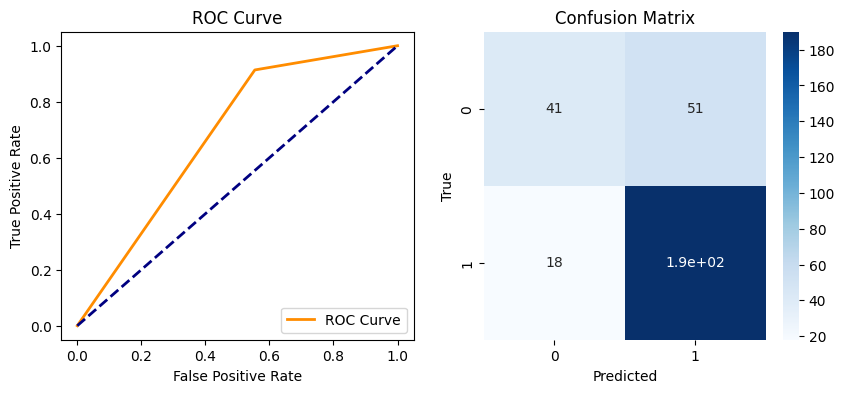

LogisticRegression() results with cross-validation:


Cross-validation results:
precision_std: 0.02
mean_precision: 0.78
recall_std: 0.05
mean_recall: 0.88
f1_std: 0.03
mean_f1: 0.83
------------------

Avaliando o modelo DecisionTreeClassifier():


F1 Score: 0.71;
Precision: 0.74;
Recall: 0.69;
ROC AUC score: 0.57

-------------------------------



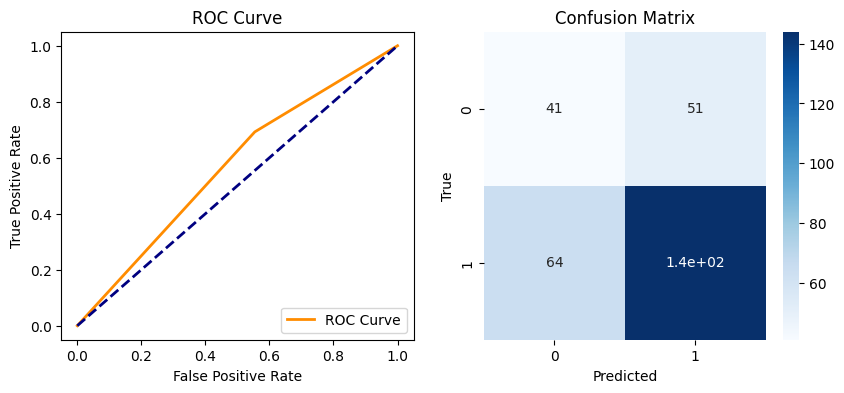

DecisionTreeClassifier() results with cross-validation:


Cross-validation results:
precision_std: 0.04
mean_precision: 0.76
recall_std: 0.06
mean_recall: 0.72
f1_std: 0.03
mean_f1: 0.74
------------------

Avaliando o modelo RandomForestClassifier():


F1 Score: 0.82;
Precision: 0.78;
Recall: 0.86;
ROC AUC score: 0.66

-------------------------------



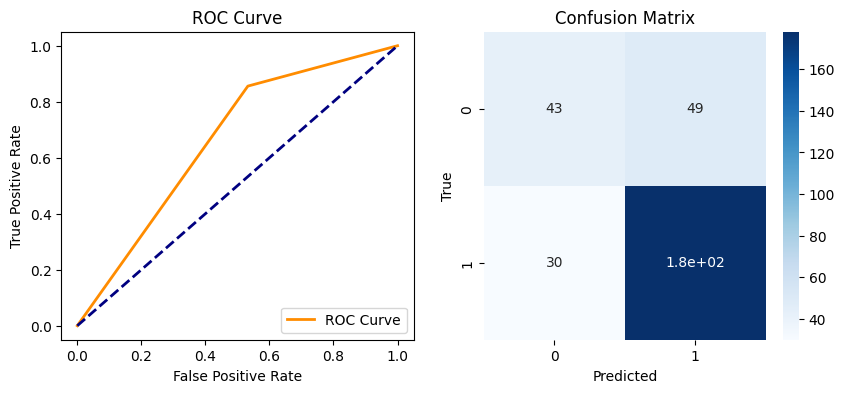

RandomForestClassifier() results with cross-validation:


Cross-validation results:
precision_std: 0.03
mean_precision: 0.78
recall_std: 0.05
mean_recall: 0.84
f1_std: 0.03
mean_f1: 0.8
------------------

------------------------
Table of results:



,Model,CV Mean Precision,CV Mean F1,CV Mean Recall,Test Precision,Test F1,Test Recall
0,Logistic Regression,0.78,0.83,0.88,0.79,0.85,0.91
1,Decision Tree Classifier,0.76,0.74,0.72,0.74,0.71,0.69
2,Random Forest Classifier,0.78,0.80,0.84,0.78,0.82,0.86


In [19]:
lreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

models = {'Logistic Regression': lreg, 
     'Decision Tree Classifier': dtc, 
     'Random Forest Classifier': rfc}

first_results = []
for model_name, model in models.items():
    f1, precision, recall, roc_auc, cfm, f1_std, mean_f1, precision_std, mean_precision, recall_std, mean_recall = pipeline(x, y, model=model)
    first_results.append({'Model': model_name,
                'CV Mean Precision': mean_precision.round(2),
                'CV Mean F1': mean_f1.round(2),
                'CV Mean Recall': mean_recall.round(2),          
                'Test Precision': precision.round(2),
                'Test F1': f1.round(2),
                'Test Recall': recall.round(2),
                })
print('------------------------\nTable of results:\n')
first_results = pd.DataFrame(first_results)
first_results

Based on a quick analysis of our first table of results, we can gain some valuable insights:

1. The Decision Tree Classifier (DTC) model performed the worst, regardless of whether we consider the models with cross-validation or with test data.

2. When comparing the Logistic Regression (LR) and Random Forest Classifier (RFC) models, we observed that the Logistic Regression outperformed the RFC in almost all the metrics analyzed, except for the CV Mean Precision metric.

3. Moreover, in order to improve our precision scores, we should try out some strategies to achieve better results. Precision is a metric that measures the proportion of true positives among all instances that are predicted as positive. In our model, the predicted variable is equal to 1 when a client is creditworthy and 0 when they are not. Therefore, true positives are the instances where the model correctly identifies a creditworthy client, and false positives are the instances where the model incorrectly identifies a non-creditworthy client as creditworthy. 

Let's try to achieve a minimum precision score of 0.8, which means that our model should make good recommendations for creditworthiness in at least 80% of cases and a risky recomendation in 20% of cases where the model misidentifies a risky client as non-risky. To achieve that we will try to optimize our 2 best model's parameters with GridSearchCV.

## **3.3 MODEL OPTIMIZATION WITH GRIDSEARCH AND FINAL RESULTS**

In [20]:
x_train, x_test, y_train, y_test = get_train_test(x,y)

In [21]:
lg_params = {
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],   
    'max_iter': [50, 100, 300],     
    'random_state': [None, 42]
            }

grid_lg = GridSearchCV(lreg, lg_params, cv=10, scoring='precision')

grid_lg.fit(x_train, y_train)

c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Marcilio Duarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: Convergence

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [50, 100, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [None, 42],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='precision')

In [22]:
rf_params = {
    'n_estimators'     : [10, 50, 100],
    'max_depth'        : [None, 5, 10],
    'min_samples_split': [2, 10, 100],
    'random_state'     : [None, 42]
}
grid_rf = GridSearchCV(rfc, rf_params, cv=10, scoring='precision')
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [10, 50, 100],
                         'random_state': [None, 42]},
             scoring='precision')

In [23]:
print('Logistic Regression Results:')
lg_best_param = grid_lg.best_params_
lg_best_score = grid_lg.best_score_
print(f'GridSearch best params: \n{lg_best_param}.\nGridSearch best precision score: {lg_best_score.round(2)}.')
print('\n--------------------------------\n')
print('Random Forest Classifier Results:')
rf_best_param = grid_rf.best_params_
rf_best_score = grid_rf.best_score_
print(f'GridSearch best params: \n{rf_best_param}.\nGridSearch best precision score: {rf_best_score.round(2)}.')

Logistic Regression Results:
GridSearch best params: 
{'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs'}.
GridSearch best precision score: 0.78.

--------------------------------

Random Forest Classifier Results:
GridSearch best params: 
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 42}.
GridSearch best precision score: 0.79.


In [24]:
lreg = LogisticRegression(fit_intercept=True, max_iter=50, penalty='l2', random_state=None, solver='lbfgs')
lrmodel = lreg.fit(x_train, y_train)
lr_final_yHat = lrmodel.predict(x_test)

lr_cvscores_final_precision = cross_val_score(lreg, x_train, y_train, scoring='precision', cv=10)
lr_cvscores_std_final_precision = np.std(lr_cvscores_final_precision).round(2)
lr_cvscores_mean_final_precision = np.mean(lr_cvscores_final_precision).round(2)

lr_cvscores_final_f1 = cross_val_score(lreg, x_train, y_train, scoring='f1', cv=10)
lr_cvscores_std_final_f1 = np.std(lr_cvscores_final_f1).round(2)
lr_cvscores_mean_final_f1 = np.mean(lr_cvscores_final_f1).round(2)

lr_cvscores_final_recall = cross_val_score(lreg, x_train, y_train, scoring='recall', cv=10)
lr_cvscores_std_final_recall = np.std(lr_cvscores_final_recall).round(2)
lr_cvscores_mean_final_recall = np.mean(lr_cvscores_final_recall).round(2)

Avaliando o modelo LogisticRegression(max_iter=50):


F1 Score: 0.85;
Precision: 0.79;
Recall: 0.91;
ROC AUC score: 0.68

-------------------------------



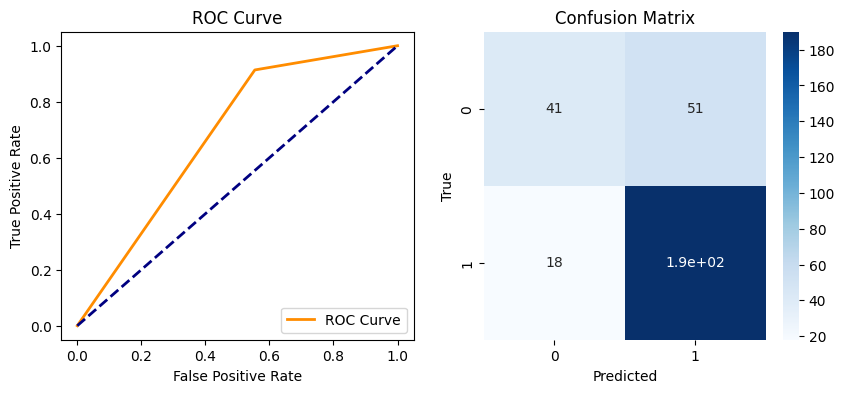

In [25]:
lr_test_f1, lr_test_precision, lr_test_recall, lr_test_roc_auc, lr_test_cfm = evaluate_model(y_test=y_test, yHat=lr_final_yHat, model=lrmodel)

In [26]:
final_results = []
final_results.append({'Model': 'Optimized LR',
                   'CV Mean Precision'   : lr_cvscores_mean_final_precision,
                   'CV Mean F1'     : lr_cvscores_mean_final_f1,
                   'CV Mean Recall.': lr_cvscores_mean_final_recall,
                   'Test Precision' : lr_test_precision.round(2),
                   'Test F1' : lr_test_f1.round(2),
                   'Test Recall' : lr_test_recall.round(2)
                   })

In [27]:
## Aplicando o melhor modelo manualmente:

rfc = RandomForestClassifier(max_depth=None, min_samples_split=10, n_estimators=10, random_state=42)
rfcmodel = rfc.fit(x_train, y_train)
rfc_final_yHat = rfcmodel.predict(x_test)

rfc_cvscores_final_precision = cross_val_score(rfc, x_train, y_train, scoring='precision', cv=10)
rfc_cvscores_std_final_precision = np.std(rfc_cvscores_final_precision).round(2)
rfc_cvscores_mean_final_precision = np.mean(rfc_cvscores_final_precision).round(2)

rfc_cvscores_final_f1 = cross_val_score(rfc, x_train, y_train, scoring='f1', cv=10)
rfc_cvscores_std_final_f1 = np.std(rfc_cvscores_final_f1).round(2)
rfc_cvscores_mean_final_f1 = np.mean(rfc_cvscores_final_f1).round(2)

rfc_cvscores_final_recall = cross_val_score(rfc, x_train, y_train, scoring='recall', cv=10)
rfc_cvscores_std_final_recall = np.std(rfc_cvscores_final_recall).round(2)
rfc_cvscores_mean_final_recall = np.mean(rfc_cvscores_final_recall).round(2)


Avaliando o modelo RandomForestClassifier(min_samples_split=10, n_estimators=10, random_state=42):


F1 Score: 0.84;
Precision: 0.79;
Recall: 0.89;
ROC AUC score: 0.68

-------------------------------



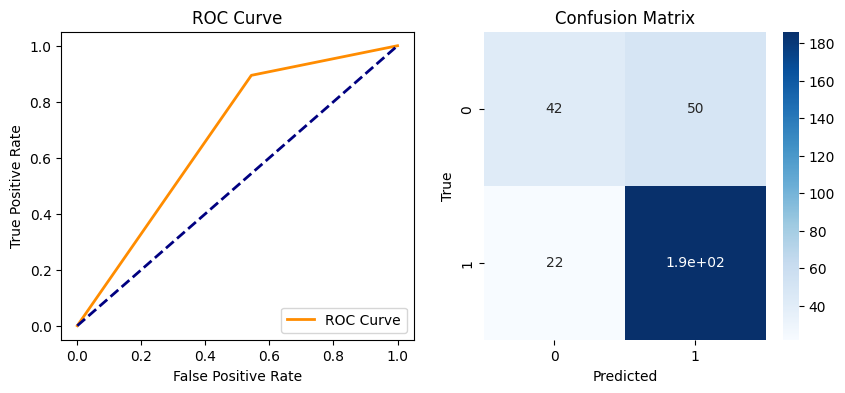

In [28]:
rfc_test_f1, rfc_test_precision, rfc_test_recall, rfc_test_roc_auc, rfc_test_cfm = evaluate_model(y_test=y_test, yHat=rfc_final_yHat, model=rfcmodel)

In [29]:
final_results.append({'Model': 'Optimized RF',
                   'CV Mean Precision'   : rfc_cvscores_mean_final_precision,
                   'CV Mean F1'     : rfc_cvscores_mean_final_f1,
                   'CV Mean Recall.': rfc_cvscores_mean_final_recall,
                   'Test Precision' : rfc_test_precision.round(2),
                   'Test F1' : rfc_test_f1.round(2),
                   'Test Recall' : rfc_test_recall.round(2)
                   })

In [30]:
final_results = pd.DataFrame(final_results)
final_results

,Model,CV Mean Precision,CV Mean F1,CV Mean Recall.,Test Precision,Test F1,Test Recall
0,Optimized LR,0.78,0.83,0.88,0.79,0.85,0.91
1,Optimized RF,0.79,0.84,0.90,0.79,0.84,0.89


After comparing the initial results with the results obtained after parameter optimization using GridSearchCV, I decided to opt for the Random Forest Classifier model with optimized parameters. Unlike the Logistic Regression model, it either matched or outperformed the previous results across all metrics, whether with or without cross-validation. 

The optimized Logistic Regression model performed the same as the one with non-optimized parameters, and it only performed better than the optimized RFC model in the F1 and Recall metrics of optimized test model.

Although we could not attain a desired average precision of 0.8 with cross-validation, the model still looks very good. So, as a result, we will save the RFC model with optimized parameters using pickle and proceed with developing the application.

## **3.4 MODEL SAVING**

Now, let's save the model in a pickle file.

In [31]:
path =  'german_credit_risk\model\model.pickle'
with open(path, 'wb' ) as file:
    pickle.dump(rfcmodel,file)

Also, let's export our train and test data for future usage.

In [34]:
files = {'x_train':'x_train.parquet', 
         'x_test':'x_test.parquet', 
         'y_train':'y_train.parquet', 
         'y_test':'y_test.parquet',
         'rfc_final_yHat': 'yhat.parquet'}

clean_path = 'german_credit_risk\data\processed'

for key, value in files.items():
    if (key=='x_train') | (key =='x_test'):
        df = locals()[key]
        df.to_parquet(clean_path + '\\' + value)
    elif (key=='rfc_final_yHat'):
        df = pd.DataFrame(locals()[key])
        df.rename(columns={0:'yhat'}, inplace=True)
        df.to_parquet(clean_path + '\\' + value)
    else:
        df = pd.DataFrame(locals()[key])
        df.to_parquet(clean_path + '\\' + value)

# **4. DEVELOPING GRADIO APP**

Finally, let's create our app with Gradio's interface. This part is actually simpler than it seems. All we need to do is create a function that will use our pickle file to make predictions, and then we just need to configure our app's interface.

Although Gradio's community is not very big yet because of its age, the library has very good documentation.

You can learn more about it [here](https://gradio.app/).

Now. Let's get it done.

In [35]:
## CREATING FUNCTION

def predict_credit_worthiness(name, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22):
    path =  'german_credit_risk/model/model.pickle'
    greet = 'Hey, ' + name + '!'
    with open(path, 'rb') as file:
        model = pickle.load(file)
        inputs = {'Account Balance_1': int(x1),
                  'Account Balance_2': int(x2),
                  'Account Balance_3': int(x3),
                  'Payment Status of Previous Credit_1': int(x4),
                  'Payment Status of Previous Credit_3': int(x5),
                  'Purpose_1': int(x6),
                  'Purpose_4': int(x7),
                  'Value Savings/Stocks_1': int(x8),
                  'Value Savings/Stocks_3': int(x9),
                  'Value Savings/Stocks_5': int(x10),
                  'Length of current employment_1': int(x11),
                  'Length of current employment_4': int(x12),
                  'Instalment per cent_4': int(x13),
                  'Guarantors_1': int(x14),
                  'Duration in Current address_1': int(x15),
                  'Duration in Current address_2': int(x16),
                  'Most valuable available asset_1': int(x17),
                  'Most valuable available asset_4': int(x18),
                  'Concurrent Credits_3': int(x19),
                  'Type of apartment_1': int(x20),
                  'No of Credits at this Bank_1': int(x21),
                  'Occupation_1': int(x22)
                  }
        prediction = model.predict([list(inputs.values())])
        
    y_test = pd.read_parquet('german_credit_risk/data/processed/y_test.parquet')
    y_test = y_test.squeeze()

    yhat = pd.read_parquet('german_credit_risk/data/processed/yhat.parquet')
    yhat = yhat.squeeze()
    
    precision = precision_score(y_test, yhat).round(2)
    recall = recall_score(y_test, yhat).round(2)
    f1 = f1_score(y_test, yhat).round(2)

    features_names =  ['No account', 'No balance', 'Some balance', 'No credit problems', 
                       'Some credit problems', 'New car', 'Other purpose', 'No savings', 
                       'DM betwenn [100, 1000]', 'DM >= 1000', 'Employment: <1 year (or unemployed)', 'Employment: 4<x<7 years', 
                       'Installment smaller than 20%', 'No guarantors', 'Less than a year in same address', '1<x<4 years in address', 
                       'Not available / no assets', 'Ownership of house or land',  'No further running credits', 'Free ap', 
                       'One credit at thins bank','Unemployed or unskilled']
    importance = model.feature_importances_
    data = pd.DataFrame()
    data['Feature Importance'] = importance
    data['Feature'] = features_names
    p = px.bar(data, y='Feature Importance', x='Feature', width=1200, height=500)
    
    cfm = confusion_matrix(y_test, yhat)
    cfm_plot = px.imshow(cfm,
                x=['Predicted 0', 'Predicted 1'],
                y=['Actual 0', 'Actual 1'],
                color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual", color="Count"),
                text_auto=True)    
    
    if prediction == 1:
        return (greet + ' According to our model, your client is eligible for the loan.', 
                'Precision: '+ str(precision), 
                'Recall: '+ str(recall), 
                'F1 Score: '+ str(f1), 
                p, 
                cfm_plot)
    else:
        return (greet + ' Unfortunately, according to our model, your client is not eligible for the loan for now :(.', 
                'Precision: '+ str(precision), 
                'Recall: '+ str(recall), 
                'F1 Score: '+ str(f1), 
                p, 
                cfm_plot)

In [ ]:
## creating the interface

with gr.Blocks() as demo:
    gr.Markdown('# Credit Worthiness Prediction')
    gr.Markdown("""
                To predict our clients' creditworthiness, please use this application as follows:
                
                1. Enter your name and navigate through the client's information tabs. Select the boxes that best match your client's characteristics. Leave blank if none apply.

                2. Once completed, click 'Predict' to determine if the client is creditworthy.
                """)
    with gr.Accordion('Name'):
        name = gr.Textbox(lines=1, label='Your name')
    with gr.Accordion("Enter your client's information"):
        with gr.Tab('Account Balance'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x1 = gr.Checkbox(1, label='No account')
            x2 = gr.Checkbox(0, label='No balance')
            x3 = gr.Checkbox(0, label='Some balance')
        with gr.Tab('Payment status of previous credit'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x4 = gr.Checkbox(1, label='Some problems')
            x5 = gr.Checkbox(0, label='No problems in this bank')
        with gr.Tab('Purpose'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x6 = gr.Checkbox(1, label='New car')
            x7 = gr.Checkbox(0, label='Other')
        with gr.Tab('Value savings/stocks'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x8 = gr.Checkbox(1, label='No savings')
            x9 = gr.Checkbox(0, label='DM betwenn [100, 1000]')
            x10 = gr.Checkbox(0, label='DM >= 1000')
        with gr.Tab('Length of current employment'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x11 = gr.Checkbox(1, label='Below 1 year (or unemployed)')
            x12 = gr.Checkbox(0, label='Between 4 and 7 years')
        with gr.Tab('Instalment per cent'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x13 = gr.Checkbox(0, label='Smaller than 20%')
        with gr.Tab('Guarantors'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x14 = gr.Checkbox(0, label='No guarantors')
        with gr.Tab('Duration in current address'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x15 = gr.Checkbox(1, label='Less than a year')
            x16 = gr.Checkbox(0, label='Between 1 and 4 years')
        with gr.Tab('Most valuable available asset'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x17 = gr.Checkbox(1, label='Not available / no assets')
            x18 = gr.Checkbox(0, label='Ownership of house or land')
        with gr.Tab('Concurrent credits'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x19 = gr.Checkbox(0, label='No further running credits')
        with gr.Tab('Type of apartment'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x20 = gr.Checkbox(0, label='Free apartment')
        with gr.Tab('Number of credits at this Bank'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x21 = gr.Checkbox(0, label='One credit')        
        with gr.Tab('Occupation'):
            gr.Markdown('Select only one option. Leave all boxes blank if none of the options fits the client.')
            x22 = gr.Checkbox(0, label='Unemployed or unskilled with no permanent') 
    predict_button = gr.Button('Predict')
    prediction_output = gr.Label(num_top_classes=2)
    with gr.Accordion('Metrics and plots'):
        with gr.Tab('Metrics'):
            with gr.Row():
                precision_output = gr.Label()
            with gr.Row():
                recall_output = gr.Label()
            with gr.Row():
                f1_output = gr.Label()
        with gr.Tab('Feature Importances'):
            fimp_output = gr.Plot()
        with gr.Tab('Confusion Matrix'):
            cfm_output = gr.Plot()
    predict_button.click(fn=predict_credit_worthiness,
                         inputs=[name, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22],
                         outputs=[prediction_output,precision_output, recall_output, f1_output, fimp_output, cfm_output])
    gr.Markdown('''
                Want to work in a project together or have interest in my services? Reach me:
                [Linkedin](https://www.linkedin.com/in/marcilioduarte98/)
                [Github](https://github.com/marcilioduarte)
                @marcilioduarte | Economics and Data Science
                ''')
demo.launch()

And that's it. Project done. Hope you enjoyed it!

 Want to work in a project together or have interest in my services? Reach me:

 [Linkedin](https://www.linkedin.com/in/marcilioduarte98/)

 [Github](https://github.com/marcilioduarte)
 
 @marcilioduarte | Economics and Data Science